#### MSc Data Science, Birkbeck
## Machine Learning - COIY065H7 - Coursework
### Artjoms Kuzmics, Student ID: 13180579, 27 April 2021


<br><br>

Loading external files and Python packages

In [186]:
import numpy as np
import pandas as pd
import copy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from numpy import mean
from numpy import std

from pandas import read_csv
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from models.ml_models import *
from models.graphics import *
import warnings

### 1.0 Linear Regression Experiments:

To evaluate and compare optimisation algorithms, I have first implemented and applied them to simple linear regression model y = a + bx. The data points were randomly generated with positive correlation between X and Y. The dataset was split into training and test set with 80/20 ratio.

In [2]:
np.random.seed(1)
X = 2 * np.random.rand(50,1)
Y = 4 +3 * X+np.random.randn(50,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)

In [3]:
def linear_model(X,Y,title, model,optimizer, opt_attr, sampling = True, iterations = 100, batch_size = 1):
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,6))
    fig.suptitle(title, fontsize=16)
    ax1.scatter(X,Y, c="tab:gray")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")    
    
    MSE = []
    for t in range(iterations):  
        if sampling:
            xs,ys = sample(X,Y,batch_size)
        else: xs, ys = X, Y
        optimizer(xs,ys, attr=opt_attr)
        MSE.append([t,model.mse(X,Y)])
        progress_plot(ax1,model,X,xs)
        
    MSE = pd.DataFrame(MSE, columns=["epochs","MSE"])   
    ax2.plot(MSE["epochs"], MSE["MSE"], c="tab:blue")
    ax2.xaxis.grid(True,linestyle=":",color='black')
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Mean Squared Error")
    plt.show()

#### 1.1 Gradient Descent:

The Gradient Descent showed slow and steady convergence to the local minimum. After 60 iterations, training loss reaches plateau.

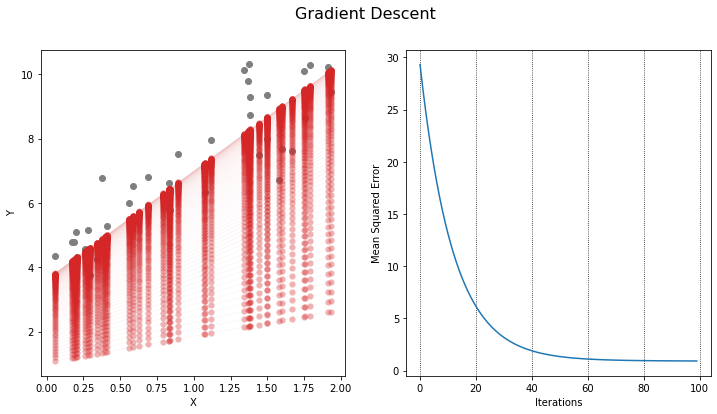

Function:  f(yhat) = 3.62 + 3.37x
Error rate (MSE) on test set: 0.66


In [4]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Gradient Descent",
            model = lm,
            optimizer = lm.gd,
            opt_attr = {"lr":0.01},
            sampling = False,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.2 Stochastic Gradient Descent:

Stochastic Gradient Descent uses only one observation on each iteration. It is noticeably more unstable, but overall performs similarly to Gradient Descent.

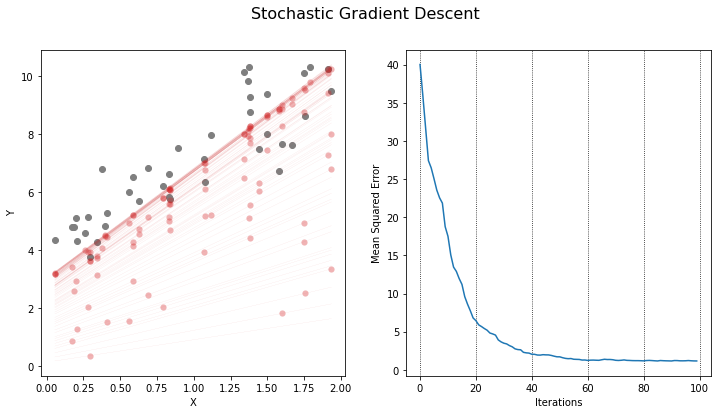

Function:  f(yhat) = 3.04 + 3.75x
Error rate (MSE) on test set: 0.89


In [5]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Stochastic Gradient Descent",
            model = lm,
            optimizer = lm.gd,
            opt_attr = {"lr":0.01},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.3 Stochastic Gradient Descent with Momentum:

Stochastic Gradient Descent with momentum preserves the moving average of previous gradient, which helps to escape local minimas and prevents oscillations. 

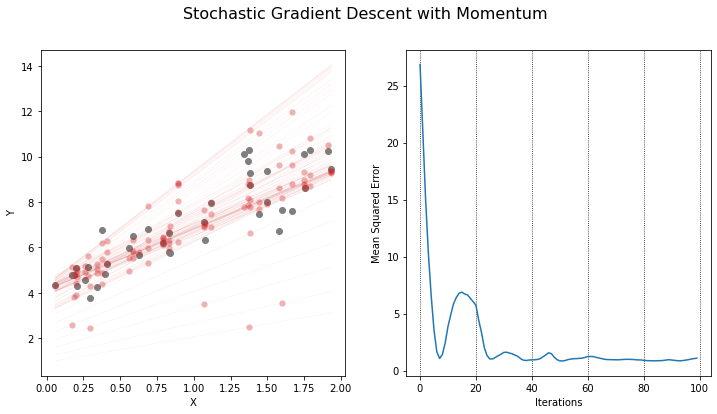

Function:  f(yhat) = 4.62 + 3.01x
Error rate (MSE) on test set: 0.96


In [6]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Stochastic Gradient Descent with Momentum",
            model = lm,
            optimizer = lm.gd_m,
            opt_attr = {"lr":0.01, "decay":0.9},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.4 Rprop:

Rprop disregards the magnitude of the gradient. It chooses to increase or decrease previous step based on the sign of two consecutive gradients: if there is a change of direction, the sign is negative and the step decreases by set factor (e.g. 0.5); if the direction is the same, the sign is positive and the step accelerates by set factor (e.g. 1.2).

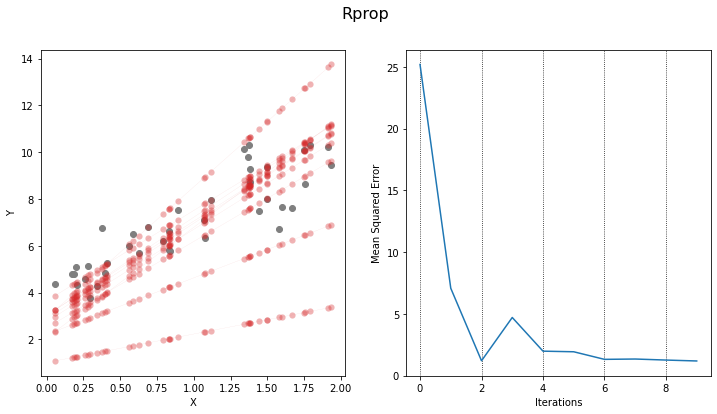

Function:  f(yhat) = 3.04 + 4.01x
Error rate (MSE) on test set: 0.84


In [7]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Rprop",
            model = lm,
            optimizer = lm.rprop,
            opt_attr = {"decay":0.9, "inc":1.2 ,"dec":0.5, "step_sizes":(0.000001,50)},
            sampling = False,
            iterations = 10,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.5 Rmsprop:

Rmsprop addresses mini-batch limitation of Rprop by keeping moving average of squared gradient for each weight Θ. The current gradient in each batch is adjusted by dividing it by the square root of Θ, smoothing step size update across all batches. 

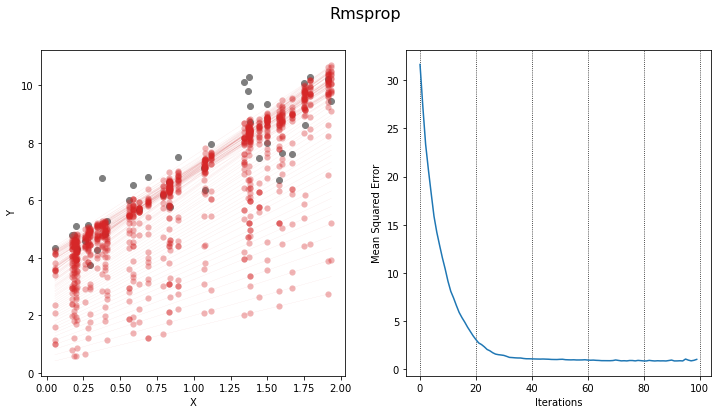

Function:  f(yhat) = 3.75 + 2.96x
Error rate (MSE) on test set: 0.91


In [8]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Rmsprop",
            model = lm,
            optimizer = lm.rmsprop,
            opt_attr = {"lr":0.1, "decay":0.9,  "eps":0.000001},
            sampling = True,
            iterations = 100,
            batch_size = 10,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.6 Adam:

Adam an is improvement on Rmsprop algorithm. It uses average of first (the mean) and second (uncentered variance) moments of gradients. 

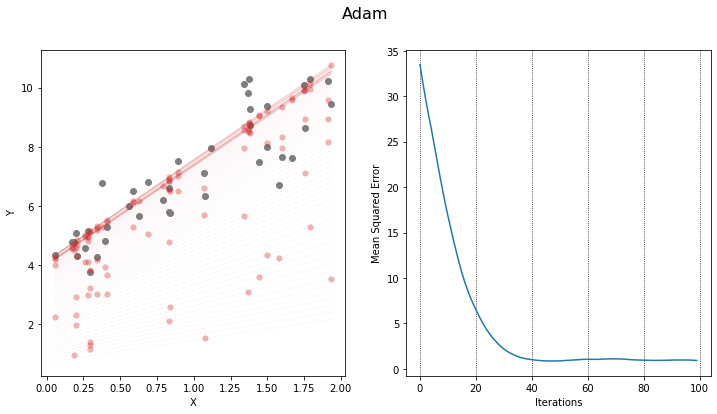

Function:  f(yhat) = 4.0 + 3.32x
Error rate (MSE) on test set: 0.64


In [9]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Adam",
            model = lm,
            optimizer = lm.adam,
            opt_attr = {"lr":0.1, "decay":0.9,  "eps":0.000001, "b":(0.9,0.999), "eps":0.000001},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

#### 1.7 WAME:

Wame combines the idea of adjusting acceleration based on the sign from Rprop and the idea of smoothing by squared gradient between mini-batches from Rmsprop.

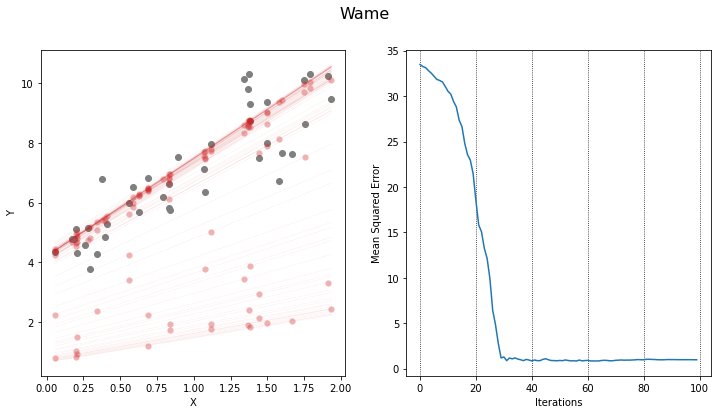

Function:  f(yhat) = 4.21 + 3.27x
Error rate (MSE) on test set: 0.72


In [10]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Wame",
            model = lm,
            optimizer = lm.wame,
            opt_attr = {"lr":0.1,"a":0.9, "inc": 1.2 ,"dec":0.1, "step_sizes":(0.001,100)},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

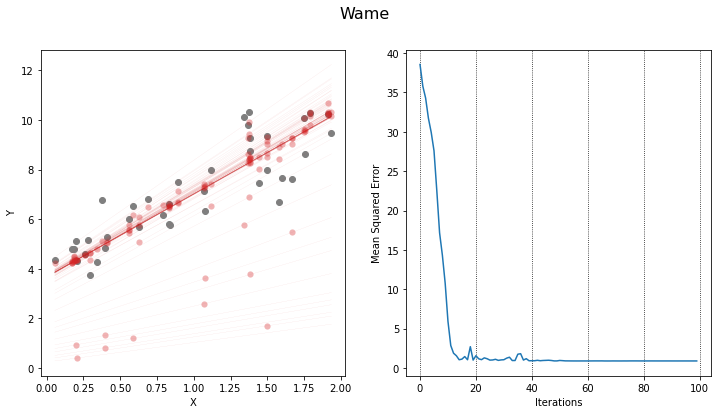

Function:  f(yhat) = 3.68 + 3.34x
Error rate (MSE) on test set: 0.65


In [11]:
lm = LinearRegression()
linear_model(X_train,y_train,
            title = "Wame",
            model = lm,
            optimizer = lm.wame,
            opt_attr = {"lr":1,"a":0.9, "inc": 1.2 ,"dec":0.1, "step_sizes":(0.001,100)},
            sampling = True,
            iterations = 100,
            batch_size = 1,
            )
print("Function: ", lm)
print("Error rate (MSE) on test set:", round(lm.mse(X_test,y_test),2))

### 2.0 Loading and Preprocessing 'Adult' Dataset:

To test Wame optimisation algorithm, I have used “Adult dataset” that is based on 1994 census and is created to predict whether income of an individual exceeds $50K/year.

In [12]:
filename = "adult.csv"
data = read_csv(filename,delimiter=",", na_values="?")

The data is imbalanced with 24,720 <= $50K and 7,841 > $50K.

In [13]:
class_counts = data.groupby('income').size()
display(class_counts)

income
<=50K    24720
>50K      7841
dtype: int64

In [14]:
X = data.iloc[:,:14]
y = data.iloc[:,14]

The benchmark model performance of imbalanced dataset can be determined by naive model that predicts only majority labels. In this case the Dummy classification returns 75.9% accuracy. 


In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
accuracy = evl(X, y, dummy)
print('Mean Accuracy: %.2f' % (mean(accuracy),))

As part of preprocessing, I have decided to perform random undersampling to equalise the number of observations in each class and reduce benchmark accuracy to 50%.

In [15]:
"""
Undersample
"""  
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X,y)

The values are missing in variables “workclass”, “occupation” and “native.country”. In order to preserve sample size and potentially reduce overfitting, I have used imputation technique to fill missing values with mode values.

In [16]:
display(X.isnull().sum())
"""
Imputation
"""
nulls =['workclass','occupation','native.country']
for i in nulls:
    X.fillna(X[i].mode()[0], inplace=True)

age                 0
workclass         731
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        733
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    288
dtype: int64

The variables “sex”, “race”, “workclass”, “native.country”, “occupation”, “relationship”, “education”, “marital.status” are categorical and had to be factorised to numerical variables. 

In [17]:
y = y.replace({'<=50K':0, '>50K':1})

X_fac = copy.deepcopy(X)
X_fac["sex"], u = pd.factorize(X["sex"])
X_fac["race"], u = pd.factorize(X["race"])
X_fac["workclass"], u = pd.factorize(X["workclass"])
X_fac["native.country"], u = pd.factorize(X["native.country"])
X_fac["occupation"], u = pd.factorize(X["occupation"])
X_fac["relationship"], u = pd.factorize(X["relationship"])
X_fac["education"], u = pd.factorize(X["education"])
X['marital.status'] = X['marital.status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
X['marital.status'] = X['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
X_fac['marital.status'] = X['marital.status'].map({'Married':1, 'Single':0})

The standard deviation varies significantly across continuous features, especially “fnlwgt” and “capital.gain”. 

In [19]:
X.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,15682.000000,1.568200e+04,15682.000000,15682.000000,15682.000000,15682.000000
mean,40.523020,1.895940e+05,10.604642,2074.045147,125.851550,42.190218
std,12.880936,1.048533e+05,2.607094,10498.293032,484.933585,12.159846
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.184970e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.776145e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.360352e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
display(X.skew())

age               0.373729
fnlwgt            1.385894
education.num    -0.332066
capital.gain      8.340248
capital.loss      3.737918
hours.per.week    0.272424
dtype: float64

To deal with varying varying scales amoing variables, I have normalised all features between 0 and 1.

In [21]:
"""
Scaling
""" 
rescaledX = copy.deepcopy(X_fac)

scaler = MinMaxScaler(feature_range=(0,1))

rescaledX = scaler.fit_transform(X_fac)
#rescaledX[["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]] = scaler.fit_transform(X_fac[["age","fnlwgt","education.num","capital.gain","capital.loss","hours.per.week"]])

 I have split the data into training and test sets with 80/20 ratio. 

In [22]:
"""
Splitting
"""

X_train, X_test, y_train, y_test = train_test_split(rescaledX,y.to_numpy(),test_size=0.2, random_state=1)


### 3.0 Neural Network Experiments:

In [175]:
def ml_model(X_train, y_train, model, optimizer, opt_attr, batch_size = 128, epochs = 100, folds = 10, display=True):
    
    splits = StratifiedKFold(n_splits = folds, shuffle = True)
    
    log = []
    it = 1
    for fold, (train_idx, valid_idx) in enumerate(splits.split(X_train, y_train)):
        if display: print("\nFold:", fold+1)
                    
        X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
        X_valid_fold, y_valid_fold = X_train[valid_idx], y_train[valid_idx]

        for t in range(epochs):
        
            train_loss, train_acc = [], []
            valid_loss, valid_acc = [], []  

            X_t_batch = sample_batch(X_train_fold, batch_size)
            y_t_batch = sample_batch(y_train_fold, batch_size)

            X_v_batch = sample_batch(X_valid_fold, batch_size)
            y_v_batch = sample_batch(y_valid_fold, batch_size)

            for Xs, ys in zip(X_t_batch, y_t_batch):
                                
                nn.forward(Xs)
                
                _, running_loss = nn.b_cross_entropy(ys, nn.A3)
                train_loss.append(running_loss)
                
                _, _, running_acc = nn.predict(Xs,ys)
                train_acc.append(running_acc)
                
                nn.backward(ys, nn.db_cross_entropy)
                optimizer(attr=opt_attr)

            
            epoch_train_loss = sum(train_loss) / len(train_loss)
            epoch_train_acc = sum(train_acc) / len(train_acc)

            for Xs, ys in zip(X_v_batch, y_v_batch):            
                
                probs, _, running_acc = nn.predict(Xs,ys)
                _, running_loss = nn.b_cross_entropy(ys, probs)
                valid_loss.append(running_loss)
                valid_acc.append(running_acc)
             
            epoch_valid_loss = sum(valid_loss) / len(valid_loss)
            epoch_valid_acc = sum(valid_acc) / len(valid_acc)
            
            if t % 2 == 0 and display:
                print("Epoch: {:02d} - Loss: {:.4f} - Acc: {:.4f} - ".format(t, epoch_train_loss, epoch_train_acc), end="")
                print("Val_Loss: {:.4f} - Val_Acc: {:.4f}".format(epoch_valid_loss, epoch_valid_acc))  
            
            log.append([it, epoch_train_loss, epoch_train_acc, epoch_valid_loss, epoch_valid_acc])
            it += 1
    return pd.DataFrame(log, columns=["epochs","T Loss","T Accuracy","V Loss", "V Accuracy"])        

#### 3.1 Gradient Descent:

Similar to linear regression example, Stochastic Gradient Descent shows slow and steady convergence. 


Fold: 1
Epoch: 00 - Loss: 0.5952 - Acc: 70.9449 - Val_Loss: 0.5607 - Val_Acc: 70.3125
Epoch: 02 - Loss: 0.4722 - Acc: 77.2786 - Val_Loss: 0.4840 - Val_Acc: 73.2292
Epoch: 04 - Loss: 0.4462 - Acc: 78.6365 - Val_Loss: 0.4643 - Val_Acc: 74.4271
Epoch: 06 - Loss: 0.4373 - Acc: 79.2969 - Val_Loss: 0.4610 - Val_Acc: 74.3750
Epoch: 08 - Loss: 0.4329 - Acc: 79.5573 - Val_Loss: 0.4598 - Val_Acc: 74.7396

Fold: 2
Epoch: 00 - Loss: 0.4258 - Acc: 79.9265 - Val_Loss: 0.4282 - Val_Acc: 80.6920
Epoch: 02 - Loss: 0.4235 - Acc: 79.9816 - Val_Loss: 0.4271 - Val_Acc: 80.6920
Epoch: 04 - Loss: 0.4213 - Acc: 79.9632 - Val_Loss: 0.4259 - Val_Acc: 81.0268
Epoch: 06 - Loss: 0.4194 - Acc: 80.1287 - Val_Loss: 0.4248 - Val_Acc: 80.8036
Epoch: 08 - Loss: 0.4176 - Acc: 80.1930 - Val_Loss: 0.4237 - Val_Acc: 80.7478

Fold: 3
Epoch: 00 - Loss: 0.4226 - Acc: 80.2665 - Val_Loss: 0.3955 - Val_Acc: 81.5848
Epoch: 02 - Loss: 0.4211 - Acc: 80.2665 - Val_Loss: 0.3948 - Val_Acc: 81.5290
Epoch: 04 - Loss: 0.4198 - Acc: 80.26

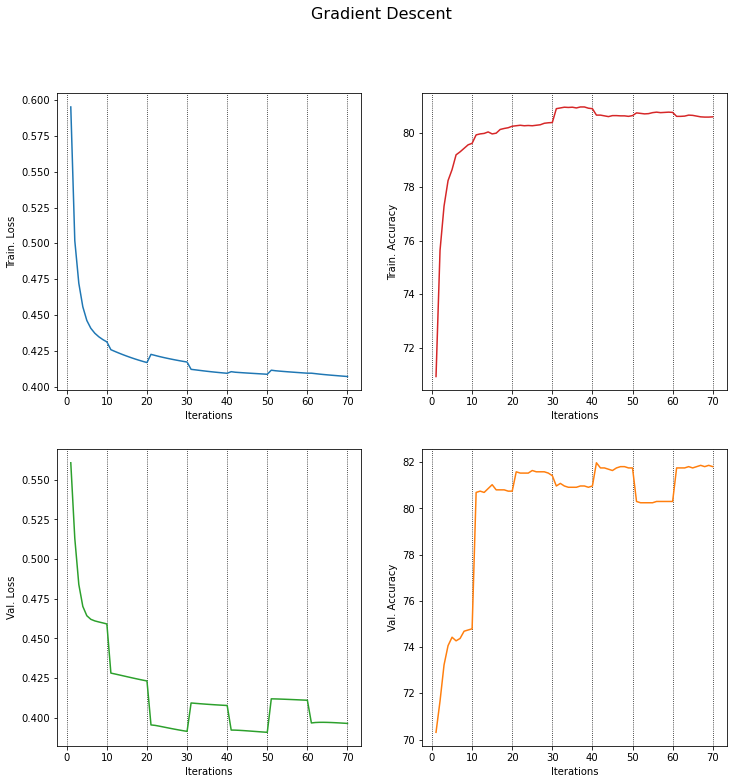

In [24]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.gd, 
                opt_attr = {"lr":0.01},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Gradient Descent")

#### 3.2 Gradient Descent with momentum:


Fold: 1
Epoch: 00 - Loss: 0.6082 - Acc: 69.7731 - Val_Loss: 0.5175 - Val_Acc: 75.4167
Epoch: 02 - Loss: 0.4697 - Acc: 76.9624 - Val_Loss: 0.4480 - Val_Acc: 77.9167
Epoch: 04 - Loss: 0.4422 - Acc: 79.2969 - Val_Loss: 0.4241 - Val_Acc: 79.1146
Epoch: 06 - Loss: 0.4306 - Acc: 79.7991 - Val_Loss: 0.4146 - Val_Acc: 80.5208
Epoch: 08 - Loss: 0.4252 - Acc: 80.0502 - Val_Loss: 0.4093 - Val_Acc: 80.5729

Fold: 2
Epoch: 00 - Loss: 0.4231 - Acc: 80.4320 - Val_Loss: 0.4081 - Val_Acc: 80.7478
Epoch: 02 - Loss: 0.4197 - Acc: 80.4963 - Val_Loss: 0.4060 - Val_Acc: 80.6920
Epoch: 04 - Loss: 0.4174 - Acc: 80.5974 - Val_Loss: 0.4040 - Val_Acc: 80.7478
Epoch: 06 - Loss: 0.4153 - Acc: 80.6342 - Val_Loss: 0.4022 - Val_Acc: 80.8036
Epoch: 08 - Loss: 0.4134 - Acc: 80.7169 - Val_Loss: 0.4005 - Val_Acc: 80.8036

Fold: 3
Epoch: 00 - Loss: 0.4118 - Acc: 80.5974 - Val_Loss: 0.3912 - Val_Acc: 81.8638
Epoch: 02 - Loss: 0.4102 - Acc: 80.6434 - Val_Loss: 0.3897 - Val_Acc: 81.9196
Epoch: 04 - Loss: 0.4085 - Acc: 80.70

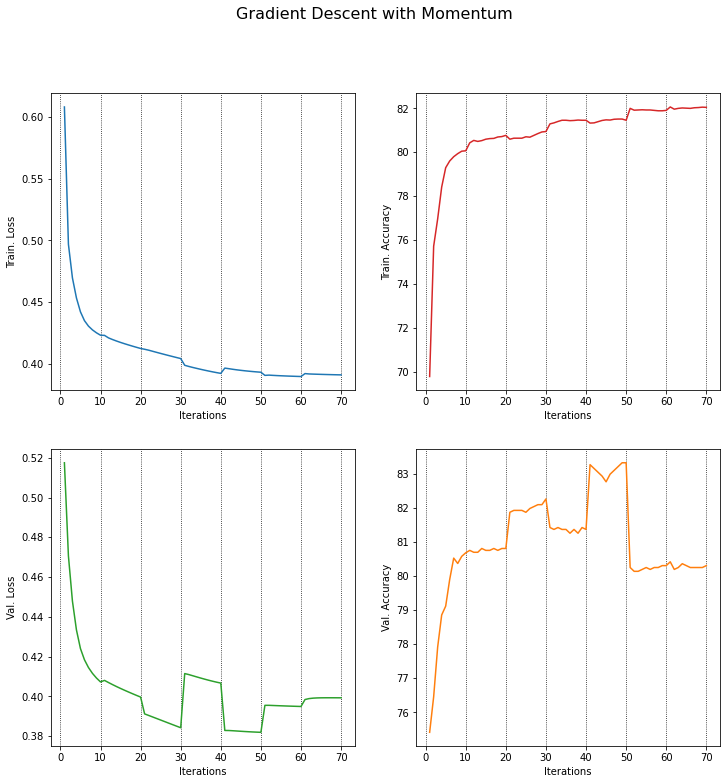

In [25]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.gd_m, 
                opt_attr = {"lr":0.001,"decay":0.9},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Gradient Descent with Momentum")

#### 3.3 Rprop:

Rprop is trained on all datapoints in each fold and shows again rapid a convergence. To avoid overfitting, I have limited its training to only 2 epochs. 


Fold: 1
Epoch: 00 - Loss: 0.7380 - Acc: 63.2719 - Val_Loss: 0.8127 - Val_Acc: 38.1138

Fold: 2
Epoch: 00 - Loss: 0.4796 - Acc: 80.6521 - Val_Loss: 0.4711 - Val_Acc: 78.1250

Fold: 3
Epoch: 00 - Loss: 0.4780 - Acc: 80.6202 - Val_Loss: 0.4709 - Val_Acc: 78.4598

Fold: 4
Epoch: 00 - Loss: 0.5517 - Acc: 66.5338 - Val_Loss: 0.4821 - Val_Acc: 77.4554

Fold: 5
Epoch: 00 - Loss: 0.4754 - Acc: 80.8833 - Val_Loss: 0.4796 - Val_Acc: 76.7299

Fold: 6
Epoch: 00 - Loss: 0.4751 - Acc: 80.7159 - Val_Loss: 0.4786 - Val_Acc: 78.0134

Fold: 7
Epoch: 00 - Loss: 0.4739 - Acc: 80.8195 - Val_Loss: 0.4838 - Val_Acc: 77.3996

Accuracy on test set 77.37%


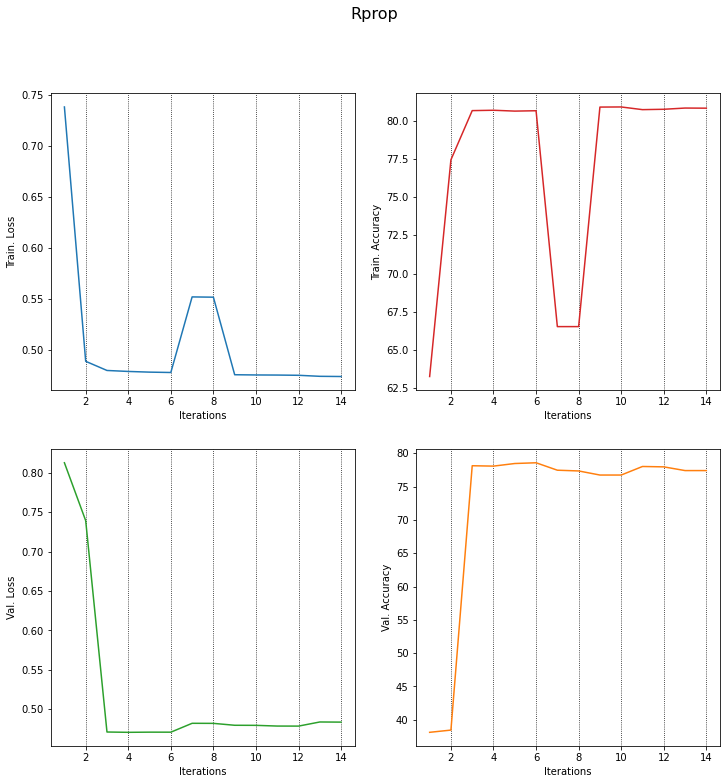

In [26]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.rprop, 
                opt_attr = {"inc":1.2, "dec":0.5, "step_sizes":(0.0001,50)},
                batch_size = len(X_train)//7,
                epochs = 2,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Rprop")

#### 3.4 Rmsprop:

Rmsprop shows a good performance with smooth convergence on batch training. Validation accuracy falls after 50th iteration, which signals overfitting. 


Fold: 1
Epoch: 00 - Loss: 0.6357 - Acc: 72.0517 - Val_Loss: 0.5793 - Val_Acc: 74.4271
Epoch: 02 - Loss: 0.5100 - Acc: 75.7068 - Val_Loss: 0.4927 - Val_Acc: 77.0312
Epoch: 04 - Loss: 0.4872 - Acc: 76.2091 - Val_Loss: 0.4804 - Val_Acc: 77.3958
Epoch: 06 - Loss: 0.4751 - Acc: 76.7206 - Val_Loss: 0.4717 - Val_Acc: 78.4375

Fold: 2
Epoch: 00 - Loss: 0.5378 - Acc: 73.5938 - Val_Loss: 0.4816 - Val_Acc: 77.3438
Epoch: 02 - Loss: 0.5026 - Acc: 75.9283 - Val_Loss: 0.4632 - Val_Acc: 77.4554
Epoch: 04 - Loss: 0.4952 - Acc: 76.5625 - Val_Loss: 0.4553 - Val_Acc: 78.2366
Epoch: 06 - Loss: 0.4958 - Acc: 76.2960 - Val_Loss: 0.4525 - Val_Acc: 78.0134

Fold: 3
Epoch: 00 - Loss: 0.4783 - Acc: 76.9761 - Val_Loss: 0.4872 - Val_Acc: 75.1116
Epoch: 02 - Loss: 0.4536 - Acc: 78.6765 - Val_Loss: 0.4710 - Val_Acc: 76.8973
Epoch: 04 - Loss: 0.4392 - Acc: 79.6048 - Val_Loss: 0.4625 - Val_Acc: 77.5670
Epoch: 06 - Loss: 0.4332 - Acc: 79.8529 - Val_Loss: 0.4593 - Val_Acc: 77.7902

Fold: 4
Epoch: 00 - Loss: 0.4320 - A

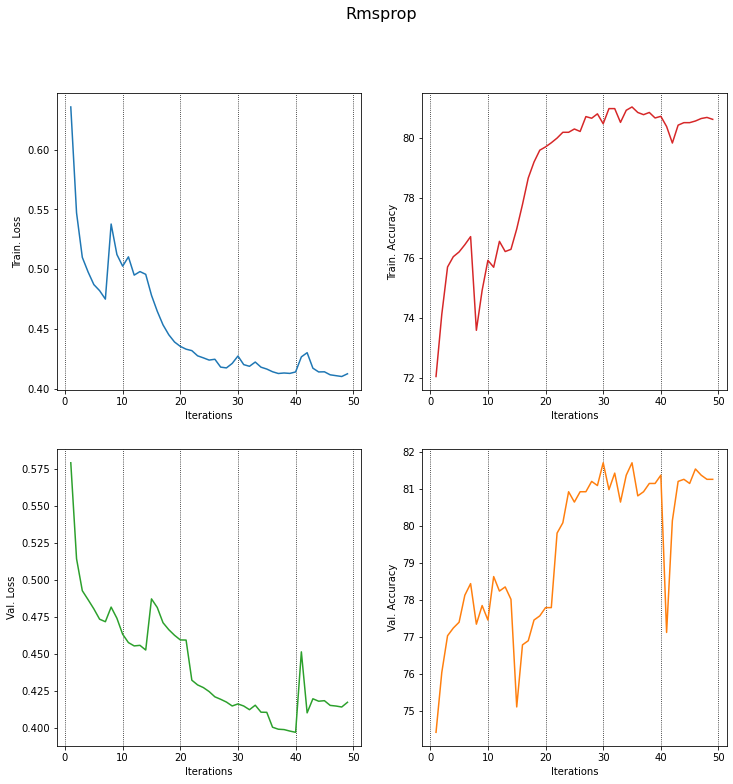

In [75]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.rmsprop, 
                opt_attr = {"lr":0.005, "decay":0.9, "eps":0.0001},
                batch_size = 128,
                epochs = 7,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Rmsprop")


Fold: 1
Epoch: 00 - Loss: 0.6992 - Acc: 50.3255 - Val_Loss: 0.6732 - Val_Acc: 58.9062
Epoch: 02 - Loss: 0.6545 - Acc: 72.3028 - Val_Loss: 0.6513 - Val_Acc: 72.3958
Epoch: 04 - Loss: 0.6184 - Acc: 72.7772 - Val_Loss: 0.6071 - Val_Acc: 73.6458
Epoch: 06 - Loss: 0.5830 - Acc: 72.7679 - Val_Loss: 0.5730 - Val_Acc: 73.6458
Epoch: 08 - Loss: 0.5541 - Acc: 72.8051 - Val_Loss: 0.5469 - Val_Acc: 73.8021

Fold: 2
Epoch: 00 - Loss: 0.5330 - Acc: 73.4007 - Val_Loss: 0.5295 - Val_Acc: 72.9353
Epoch: 02 - Loss: 0.5188 - Acc: 74.2096 - Val_Loss: 0.5158 - Val_Acc: 74.9442
Epoch: 04 - Loss: 0.5078 - Acc: 75.2665 - Val_Loss: 0.5057 - Val_Acc: 75.3348
Epoch: 06 - Loss: 0.5003 - Acc: 75.5423 - Val_Loss: 0.4981 - Val_Acc: 75.3906
Epoch: 08 - Loss: 0.4936 - Acc: 75.8364 - Val_Loss: 0.4914 - Val_Acc: 75.7254

Fold: 3
Epoch: 00 - Loss: 0.4892 - Acc: 75.9743 - Val_Loss: 0.4848 - Val_Acc: 75.8929
Epoch: 02 - Loss: 0.4866 - Acc: 76.2040 - Val_Loss: 0.4815 - Val_Acc: 76.2277
Epoch: 04 - Loss: 0.4810 - Acc: 76.44

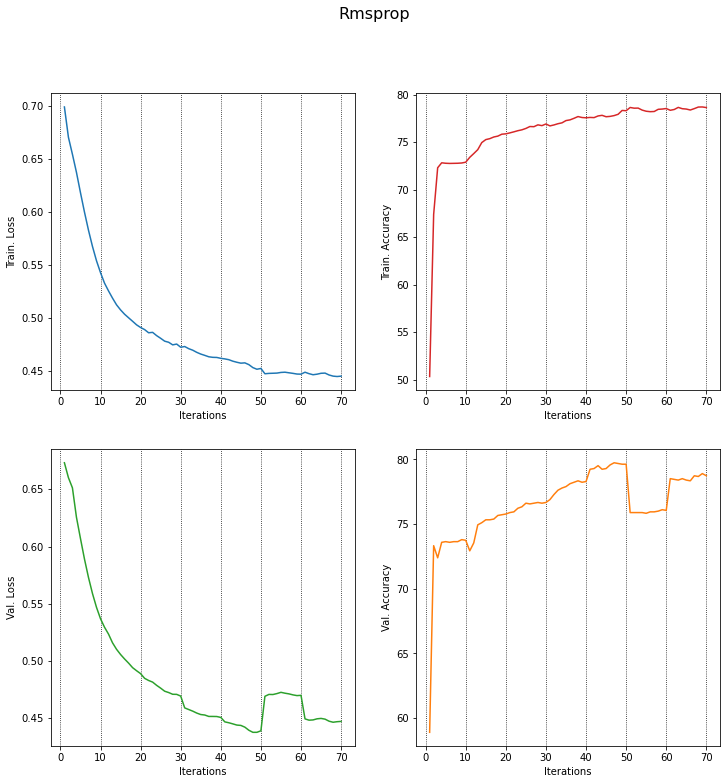

In [27]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.rmsprop, 
                opt_attr = {"lr":0.001, "decay":0.9, "eps":0.0001},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Rmsprop")

#### 3.5 Adam:

Adam shows higher test accuracy rate, but the overfitting can also be observed. 


Fold: 1
Epoch: 00 - Loss: 0.6118 - Acc: 70.2381 - Val_Loss: 0.5269 - Val_Acc: 74.8958
Epoch: 02 - Loss: 0.4617 - Acc: 77.4461 - Val_Loss: 0.4529 - Val_Acc: 78.8542
Epoch: 04 - Loss: 0.4301 - Acc: 79.7619 - Val_Loss: 0.4234 - Val_Acc: 80.7292
Epoch: 06 - Loss: 0.4152 - Acc: 80.5432 - Val_Loss: 0.4107 - Val_Acc: 80.8854
Epoch: 08 - Loss: 0.4083 - Acc: 80.9152 - Val_Loss: 0.4053 - Val_Acc: 80.9896

Fold: 2
Epoch: 00 - Loss: 0.4069 - Acc: 81.0202 - Val_Loss: 0.4081 - Val_Acc: 81.3616
Epoch: 02 - Loss: 0.4048 - Acc: 81.2684 - Val_Loss: 0.4057 - Val_Acc: 81.0826
Epoch: 04 - Loss: 0.4033 - Acc: 81.3327 - Val_Loss: 0.4039 - Val_Acc: 81.0826
Epoch: 06 - Loss: 0.4023 - Acc: 81.3143 - Val_Loss: 0.4024 - Val_Acc: 81.3058
Epoch: 08 - Loss: 0.4015 - Acc: 81.3143 - Val_Loss: 0.4011 - Val_Acc: 81.3616

Fold: 3
Epoch: 00 - Loss: 0.4046 - Acc: 80.9559 - Val_Loss: 0.3780 - Val_Acc: 83.4263
Epoch: 02 - Loss: 0.4038 - Acc: 80.9467 - Val_Loss: 0.3784 - Val_Acc: 83.3705
Epoch: 04 - Loss: 0.4032 - Acc: 81.04

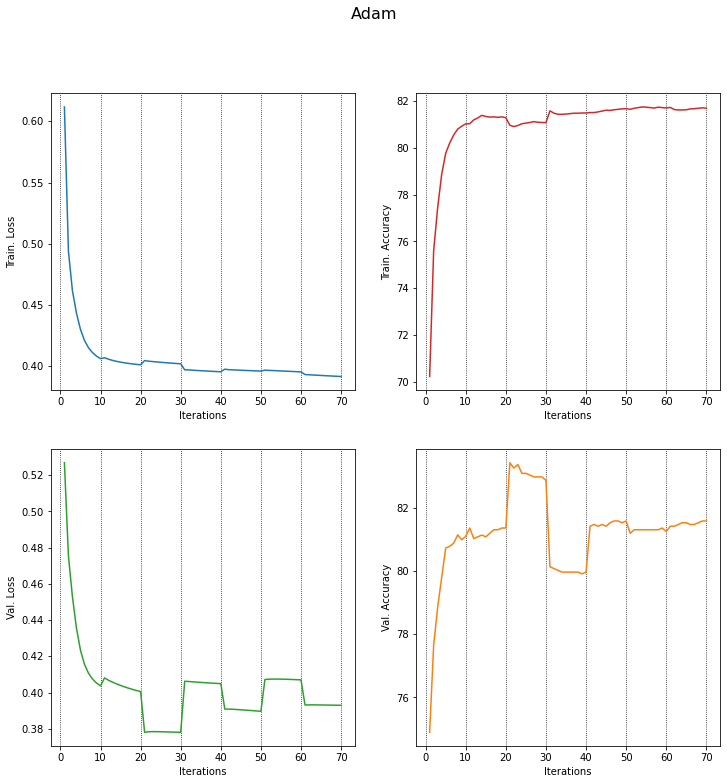

In [28]:
# Adam -- number of iterations

nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 
nn.t = 1

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.adam, 
                opt_attr = {"lr":0.01, "b":(0.9,0.999), "eps":0.0001},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Adam")


Fold: 1
Epoch: 00 - Loss: 0.5309 - Acc: 72.5074 - Val_Loss: 0.4926 - Val_Acc: 71.6667
Epoch: 02 - Loss: 0.4136 - Acc: 79.9665 - Val_Loss: 0.4879 - Val_Acc: 73.3333

Fold: 2
Epoch: 00 - Loss: 0.4161 - Acc: 80.0092 - Val_Loss: 0.3926 - Val_Acc: 80.6362
Epoch: 02 - Loss: 0.4085 - Acc: 80.6342 - Val_Loss: 0.3874 - Val_Acc: 81.5848

Fold: 3
Epoch: 00 - Loss: 0.4008 - Acc: 81.2868 - Val_Loss: 0.4149 - Val_Acc: 79.9665
Epoch: 02 - Loss: 0.3964 - Acc: 81.5349 - Val_Loss: 0.4137 - Val_Acc: 80.2455

Fold: 4
Epoch: 00 - Loss: 0.3939 - Acc: 81.6452 - Val_Loss: 0.4122 - Val_Acc: 80.8594
Epoch: 02 - Loss: 0.3910 - Acc: 81.7831 - Val_Loss: 0.4108 - Val_Acc: 80.6362

Fold: 5
Epoch: 00 - Loss: 0.3994 - Acc: 81.3879 - Val_Loss: 0.3644 - Val_Acc: 82.6451
Epoch: 02 - Loss: 0.3978 - Acc: 81.5074 - Val_Loss: 0.3635 - Val_Acc: 82.7009

Fold: 6
Epoch: 00 - Loss: 0.3976 - Acc: 80.7169 - Val_Loss: 0.3904 - Val_Acc: 81.4732
Epoch: 02 - Loss: 0.3987 - Acc: 80.6801 - Val_Loss: 0.3907 - Val_Acc: 81.4174

Fold: 7
E

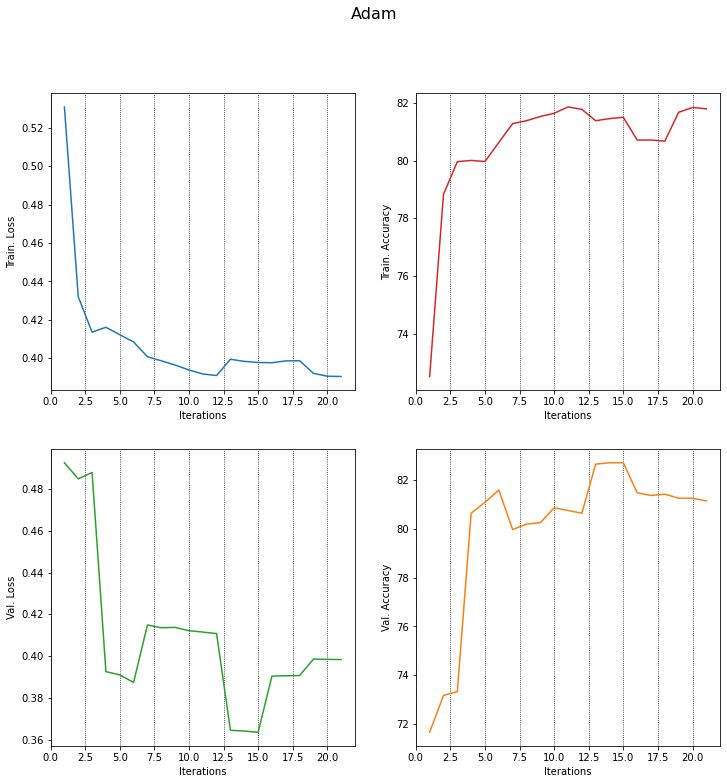

In [83]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 
nn.t = 1

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.adam, 
                opt_attr = {"lr":0.1, "b":(0.9,0.999), "eps":0.0001},
                batch_size = 128,
                epochs = 3,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Adam")

#### 3.6 Wame:

Wame achieves rapid convergence to global minimum.  Increasing number of epochs does improve the accuracy, but only marginally. The learning rate is tuned automatically in the process of training. Therefore, adjusting learning rate has insignificant influence on behaviour of the algorithm.


Fold: 1
Epoch: 00 - Loss: 0.6284 - Acc: 68.8405 - Val_Loss: 0.5842 - Val_Acc: 73.5505
Epoch: 02 - Loss: 0.5876 - Acc: 69.6670 - Val_Loss: 0.6028 - Val_Acc: 62.4826
Epoch: 04 - Loss: 0.5615 - Acc: 73.5894 - Val_Loss: 0.5507 - Val_Acc: 74.5661
Epoch: 06 - Loss: 0.5545 - Acc: 74.2566 - Val_Loss: 0.5439 - Val_Acc: 74.7414
Epoch: 08 - Loss: 0.5481 - Acc: 74.7306 - Val_Loss: 0.5372 - Val_Acc: 75.1699
Epoch: 10 - Loss: 0.5421 - Acc: 74.8359 - Val_Loss: 0.5312 - Val_Acc: 75.4824
Epoch: 12 - Loss: 0.5367 - Acc: 74.9237 - Val_Loss: 0.5262 - Val_Acc: 75.3474
Epoch: 14 - Loss: 0.5319 - Acc: 74.9419 - Val_Loss: 0.5216 - Val_Acc: 75.6197
Epoch: 16 - Loss: 0.5278 - Acc: 75.1263 - Val_Loss: 0.5173 - Val_Acc: 75.6978
Epoch: 18 - Loss: 0.5242 - Acc: 75.2222 - Val_Loss: 0.5126 - Val_Acc: 75.6978
Epoch: 20 - Loss: 0.5208 - Acc: 75.2046 - Val_Loss: 0.5088 - Val_Acc: 75.7759
Epoch: 22 - Loss: 0.5178 - Acc: 75.4153 - Val_Loss: 0.5057 - Val_Acc: 75.9322
Epoch: 24 - Loss: 0.5152 - Acc: 75.5469 - Val_Loss: 0.5

Epoch: 04 - Loss: 0.4151 - Acc: 80.9606 - Val_Loss: 0.4226 - Val_Acc: 80.3248
Epoch: 06 - Loss: 0.4148 - Acc: 80.9694 - Val_Loss: 0.4224 - Val_Acc: 80.4029
Epoch: 08 - Loss: 0.4145 - Acc: 80.9870 - Val_Loss: 0.4222 - Val_Acc: 80.4810
Epoch: 10 - Loss: 0.4142 - Acc: 80.9606 - Val_Loss: 0.4219 - Val_Acc: 80.4810
Epoch: 12 - Loss: 0.4139 - Acc: 80.9255 - Val_Loss: 0.4217 - Val_Acc: 80.5591
Epoch: 14 - Loss: 0.4137 - Acc: 80.9255 - Val_Loss: 0.4214 - Val_Acc: 80.5591
Epoch: 16 - Loss: 0.4134 - Acc: 80.9519 - Val_Loss: 0.4212 - Val_Acc: 80.5591
Epoch: 18 - Loss: 0.4131 - Acc: 80.9519 - Val_Loss: 0.4209 - Val_Acc: 80.5591
Epoch: 20 - Loss: 0.4128 - Acc: 80.9519 - Val_Loss: 0.4207 - Val_Acc: 80.5591
Epoch: 22 - Loss: 0.4126 - Acc: 80.9255 - Val_Loss: 0.4205 - Val_Acc: 80.5591
Epoch: 24 - Loss: 0.4123 - Acc: 80.9080 - Val_Loss: 0.4202 - Val_Acc: 80.5591

Fold: 10
Epoch: 00 - Loss: 0.4153 - Acc: 80.6775 - Val_Loss: 0.3907 - Val_Acc: 83.0009
Epoch: 02 - Loss: 0.4150 - Acc: 80.6950 - Val_Loss: 0.

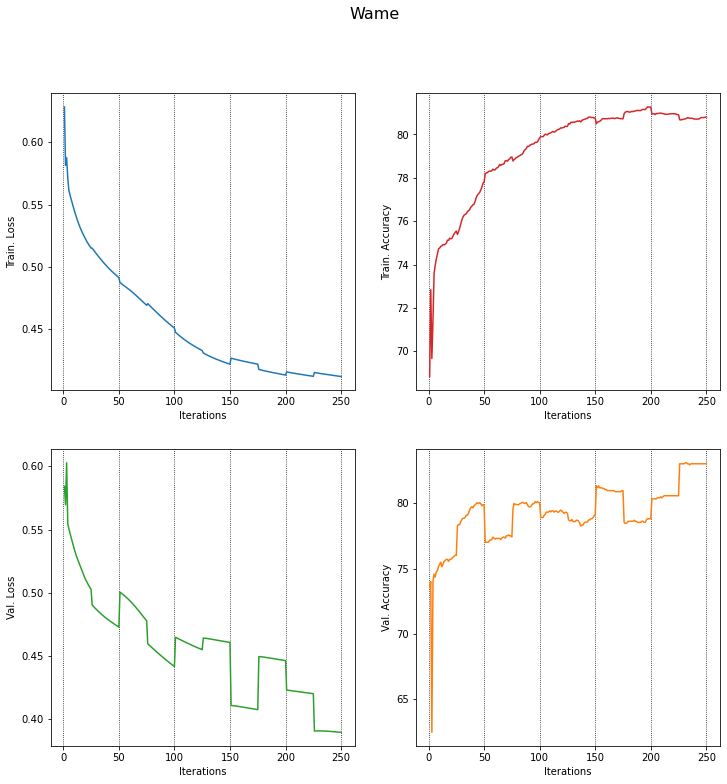

In [51]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.wame1, 
                opt_attr = {"lr":0.1, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                batch_size = 128,
                epochs = 25,
                folds = 10)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Wame")


Fold: 1
Epoch: 00 - Loss: 0.5677 - Acc: 72.7724 - Val_Loss: 0.5407 - Val_Acc: 76.2257

Fold: 2
Epoch: 00 - Loss: 0.5261 - Acc: 76.4950 - Val_Loss: 0.5242 - Val_Acc: 76.8674

Fold: 3
Epoch: 00 - Loss: 0.5132 - Acc: 77.1621 - Val_Loss: 0.4903 - Val_Acc: 78.3328

Fold: 4
Epoch: 00 - Loss: 0.5019 - Acc: 77.3552 - Val_Loss: 0.4905 - Val_Acc: 78.1933

Fold: 5
Epoch: 00 - Loss: 0.4920 - Acc: 77.5389 - Val_Loss: 0.4953 - Val_Acc: 77.4545

Fold: 6
Epoch: 00 - Loss: 0.4839 - Acc: 77.9322 - Val_Loss: 0.5109 - Val_Acc: 74.6385

Fold: 7
Epoch: 00 - Loss: 0.4815 - Acc: 77.6139 - Val_Loss: 0.4757 - Val_Acc: 78.4865

Fold: 8
Epoch: 00 - Loss: 0.4755 - Acc: 77.8269 - Val_Loss: 0.4834 - Val_Acc: 77.7834

Fold: 9
Epoch: 00 - Loss: 0.4736 - Acc: 77.8620 - Val_Loss: 0.4561 - Val_Acc: 79.0548

Fold: 10
Epoch: 00 - Loss: 0.4663 - Acc: 78.0727 - Val_Loss: 0.4835 - Val_Acc: 77.3545

Accuracy on test set 77.14%


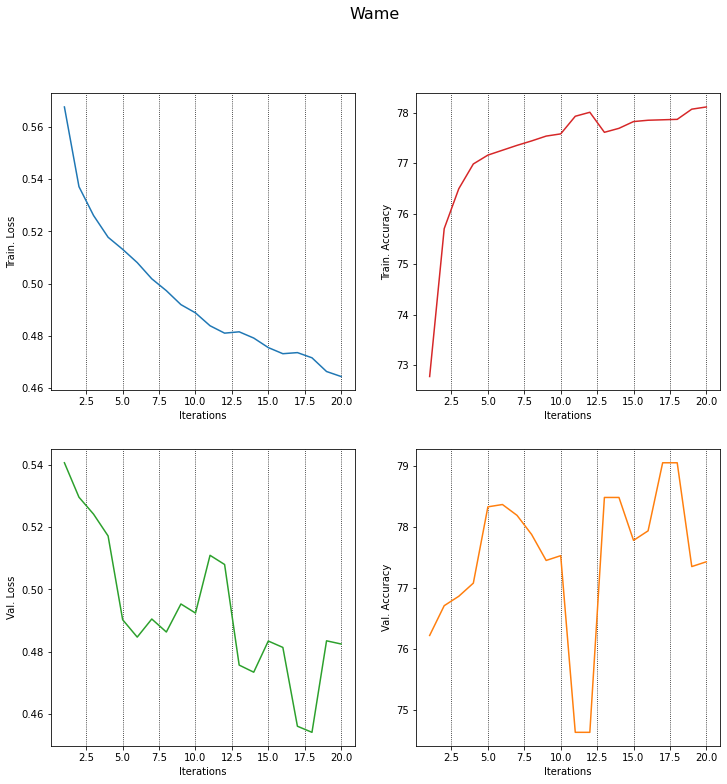

In [143]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.wame1, 
                opt_attr = {"lr":0.1, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                batch_size = 128,
                epochs = 2,
                folds = 10)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Wame")

The higher learning rate gives initial boost and then quickly normalizes  (by 0.1 factor) to optimum level. 


Fold: 1
Epoch: 00 - Loss: 0.6212 - Acc: 68.9825 - Val_Loss: 0.6082 - Val_Acc: 66.9792
Epoch: 02 - Loss: 0.6174 - Acc: 66.9736 - Val_Loss: 0.6236 - Val_Acc: 63.4375


/Users/art/Documents/ML/Coursework/NeuralNetwork/models/ml_models.py:217: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


Epoch: 04 - Loss: 0.5793 - Acc: 67.2433 - Val_Loss: 0.5595 - Val_Acc: 74.0625
Epoch: 06 - Loss: 0.5221 - Acc: 74.6001 - Val_Loss: 0.5009 - Val_Acc: 78.4375
Epoch: 08 - Loss: 0.4993 - Acc: 77.1298 - Val_Loss: 0.4775 - Val_Acc: 80.0000

Fold: 2
Epoch: 00 - Loss: 0.4827 - Acc: 78.6857 - Val_Loss: 0.5014 - Val_Acc: 76.9531
Epoch: 02 - Loss: 0.4747 - Acc: 78.8695 - Val_Loss: 0.4922 - Val_Acc: 77.3996
Epoch: 04 - Loss: 0.4673 - Acc: 79.3566 - Val_Loss: 0.4845 - Val_Acc: 78.6830
Epoch: 06 - Loss: 0.4596 - Acc: 79.8713 - Val_Loss: 0.4790 - Val_Acc: 78.5714
Epoch: 08 - Loss: 0.4528 - Acc: 80.2849 - Val_Loss: 0.4728 - Val_Acc: 79.2969

Fold: 3
Epoch: 00 - Loss: 0.4530 - Acc: 80.2941 - Val_Loss: 0.4431 - Val_Acc: 80.5246
Epoch: 02 - Loss: 0.4495 - Acc: 80.5055 - Val_Loss: 0.4516 - Val_Acc: 79.8549
Epoch: 04 - Loss: 0.4475 - Acc: 80.7996 - Val_Loss: 0.4438 - Val_Acc: 80.5246
Epoch: 06 - Loss: 0.4429 - Acc: 80.8456 - Val_Loss: 0.4416 - Val_Acc: 80.3013
Epoch: 08 - Loss: 0.4403 - Acc: 80.8915 - Val_

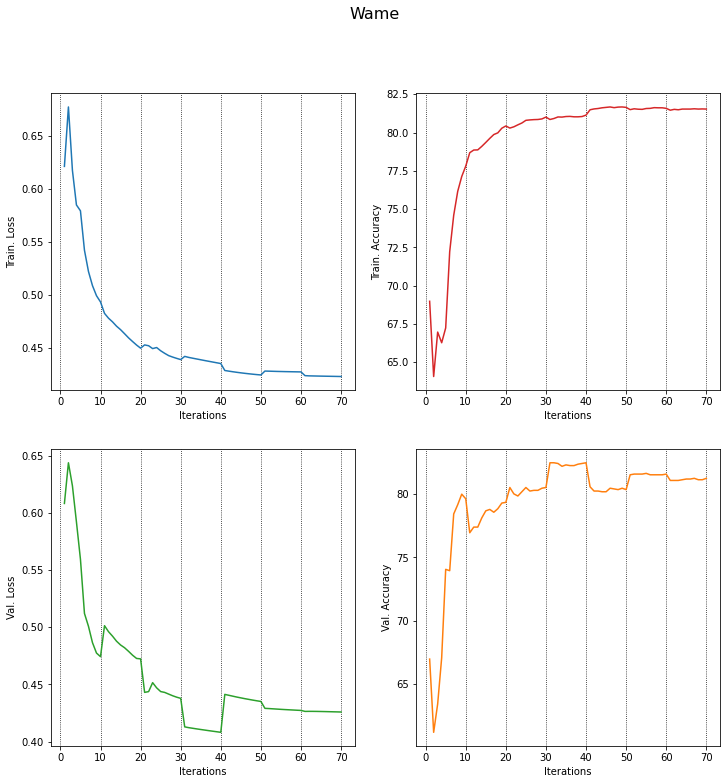

In [139]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.wame1, 
                opt_attr = {"lr":5, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Wame")

Very low learning rate gradually increases (by 1.2 factor) until it reaches suitable scale.


Fold: 1
Epoch: 00 - Loss: 0.6894 - Acc: 54.8828 - Val_Loss: 0.6865 - Val_Acc: 60.5729
Epoch: 02 - Loss: 0.6816 - Acc: 62.6023 - Val_Loss: 0.6775 - Val_Acc: 66.4583
Epoch: 04 - Loss: 0.6739 - Acc: 67.4665 - Val_Loss: 0.6696 - Val_Acc: 70.3125
Epoch: 06 - Loss: 0.6672 - Acc: 70.5357 - Val_Loss: 0.6631 - Val_Acc: 73.6979
Epoch: 08 - Loss: 0.6617 - Acc: 72.7865 - Val_Loss: 0.6577 - Val_Acc: 75.5729

Fold: 2
Epoch: 00 - Loss: 0.6565 - Acc: 74.1085 - Val_Loss: 0.6565 - Val_Acc: 72.3214
Epoch: 02 - Loss: 0.6525 - Acc: 74.4301 - Val_Loss: 0.6529 - Val_Acc: 72.5446
Epoch: 04 - Loss: 0.6490 - Acc: 74.6232 - Val_Loss: 0.6497 - Val_Acc: 72.8795
Epoch: 06 - Loss: 0.6464 - Acc: 74.6691 - Val_Loss: 0.6476 - Val_Acc: 72.9353
Epoch: 08 - Loss: 0.6442 - Acc: 74.6783 - Val_Loss: 0.6456 - Val_Acc: 72.9353

Fold: 3
Epoch: 00 - Loss: 0.6424 - Acc: 74.5496 - Val_Loss: 0.6418 - Val_Acc: 73.5491
Epoch: 02 - Loss: 0.6400 - Acc: 74.5496 - Val_Loss: 0.6395 - Val_Acc: 73.6049
Epoch: 04 - Loss: 0.6377 - Acc: 74.54

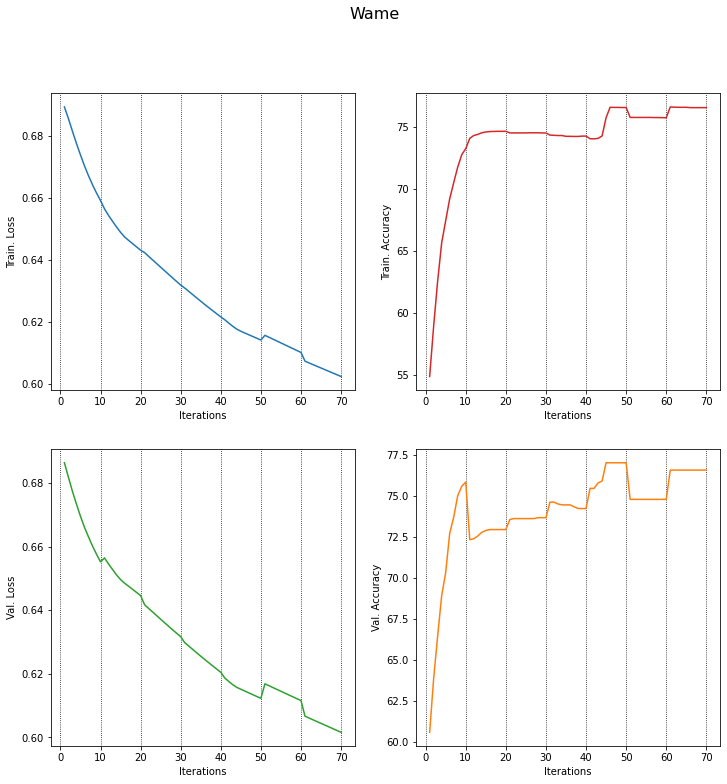

In [137]:
nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

log = ml_model(X_train, y_train, 
                model=nn, 
                optimizer=nn.wame1, 
                opt_attr = {"lr":0.00001, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                batch_size = 128,
                epochs = 10,
                folds = 7)

_, prediction, accuracy = nn.predict(X_test,y_test)
print("\nAccuracy on test set {:.2f}%".format(accuracy))

visualise_board(log, "Wame")

When testing Wame algorithm, I have noticed that it is noticeably less stable with smaller batch sizes. To compare the stability of algorithm, I have run 100 times 5-epoch training with batch size 1024,128 and 64. The findings are as follows:

In [188]:
warnings.filterwarnings('ignore')

test_acc_1 = []
for i in range(100):
    nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

    log = ml_model(X_train, y_train, 
                    model=nn, 
                    optimizer=nn.wame1, 
                    opt_attr = {"lr":0.1, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                    batch_size = 1024,
                    epochs = 5,
                    folds = 7,
                    display = False)

    _, prediction, accuracy = nn.predict(X_test,y_test)
    test_acc_1.append(accuracy)

In [189]:
warnings.filterwarnings('ignore')

test_acc_2 = []
for i in range(100):
    nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

    log = ml_model(X_train, y_train, 
                    model=nn, 
                    optimizer=nn.wame1, 
                    opt_attr = {"lr":0.1, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                    batch_size = 128,
                    epochs = 5,
                    folds = 7,
                    display = False)

    _, prediction, accuracy = nn.predict(X_test,y_test)
    test_acc_2.append(accuracy)

In [192]:
warnings.filterwarnings('ignore')

test_acc_3 = []
for i in range(100):
    nn = NeuralNetwork(input_size = X.shape[1], hidden_layer_size = 3, output_size = 1) 

    log = ml_model(X_train, y_train, 
                    model=nn, 
                    optimizer=nn.wame1, 
                    opt_attr = {"lr":0.1, "inc":1.2, "dec":0.1, "a":0.9, "step_sizes":(0.01,100)},
                    batch_size = 64,
                    epochs = 5,
                    folds = 7,
                    display = False)

    _, prediction, accuracy = nn.predict(X_test,y_test)
    test_acc_3.append(accuracy)

In [200]:
test_acc_1 = np.array(test_acc_1)
test_acc_2 = np.array(test_acc_2)
test_acc_3 = np.array(test_acc_3)

print("Batch of 1024:",round(test_acc_1.mean(),2),"% accuracy;", round(test_acc_1.std(),2), "% standard deviation")

print("Batch of 128:",round(test_acc_2.mean(),2),"% accuracy;", round(test_acc_2.std(),2), "% standard deviation")

print("Batch of 64:",round(test_acc_3.mean(),2),"% accuracy;", round(test_acc_3.std(),2), "% standard deviation")


Batch of 1024: 74.55 % accuracy; 6.46 % standard deviation
Batch of 128: 71.21 % accuracy; 10.99 % standard deviation
Batch of 64: 70.13 % accuracy; 11.89 % standard deviation
